In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import re

In [9]:
df = pd.read_csv('../../NYT_full_reviews.csv')

In [10]:
df.columns

Index([u'byline', u'critics_pick', u'date_updated', u'display_title',
       u'headline', u'link_suggested_link_text', u'link_type', u'link_url',
       u'mpaa_rating', u'multimedia_height', u'multimedia_src',
       u'multimedia_type', u'multimedia_width', u'opening_date',
       u'publication_date', u'summary_short', u'multimedia',
       u'full_review_text'],
      dtype='object')

In [11]:
df.drop(['date_updated', 'headline', 'link_suggested_link_text', 'link_type', 
         'multimedia_height', 'multimedia_src', 'multimedia_type', 'multimedia_width', 
         'link_url', 'multimedia'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 8 columns):
byline              26280 non-null object
critics_pick        26280 non-null float64
display_title       26280 non-null object
mpaa_rating         13214 non-null object
opening_date        16630 non-null object
publication_date    26280 non-null object
summary_short       20152 non-null object
full_review_text    26278 non-null object
dtypes: float64(1), object(7)
memory usage: 1.6+ MB


In [13]:
df['publication_date'] = pd.to_datetime(df['publication_date'])

In [14]:
df.set_index('publication_date', inplace=True)

In [15]:
df['year'] = df.index.year
df['month'] = df.index.month

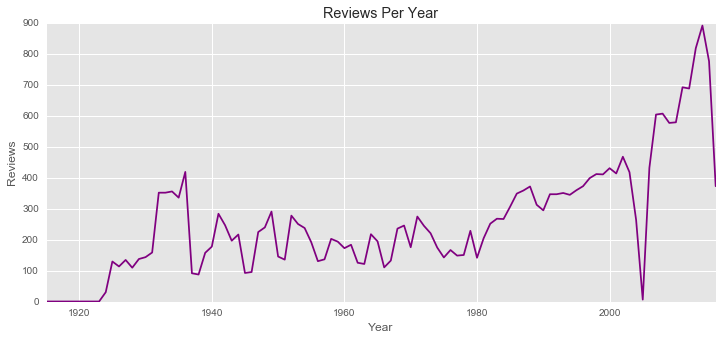

In [35]:
# reviews per year
plt.figure(figsize = (12,5))
df.year.value_counts().sort_index().plot(color = 'purple')
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.title('Reviews Per Year')

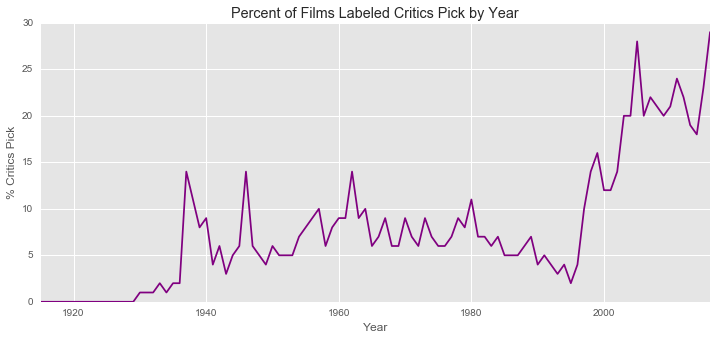

In [37]:
# plot % of movies that are "critics' picks" over time
grouped = df.groupby(by = 'year')
plt.figure(figsize = (12,5))
(100* grouped['critics_pick'].sum()/grouped['critics_pick'].count()).astype(int).plot(color = 'purple')
plt.xlabel('Year')
plt.ylabel('% Critics Pick')
plt.title('Percent of Films Labeled Critics Pick by Year')

In [38]:
# look at bylines
df['byline'] = [s.lower() for s in df.byline]
np.unique(df['byline'])

array(["' flame and the flesh' presented at state", '-- a. w.', '-- a.w.',
       '-- e.j.b.', '-- h. h. t.', '-- h.t.', '-- o. a. g.', '-- t. m. p.',
       '-- t.m.p.', '-- t.s.', '-a. w.', '..a.. w.', '.a.. w.', '.a..w.',
       '.a.w.', '.f. s. n.', '.p. w.', '].]3.', 'a. d. s.', 'a. h. w.',
       'a. h. weiler', 'a. h. weiler.', 'a. o. g.', 'a. o. scott', 'a. s.',
       'a. w', 'a. w,', 'a. w.', 'a.%v. ]', 'a.&#160;o. scott', 'a.. w.',
       'a.d.e.', 'a.d.s', 'a.d.s.', 'a.d.s.s.z.', 'a.h. weiler',
       'a.h. weiler.', 'a.h.weiler', 'a.p.s.', 'a.s.', 'a.w', 'a.w.',
       'aljean harmetz', 'allan kozinn', 'allen hughes',
       'andrbe sennwald.', 'andre senn wald.', 'andre sennwald',
       'andre sennwald.', 'andrea higbie', 'andrew geller  ',
       'andy webster', 'anet maslin', 'anita gates', 'anna kisselgoff',
       'anna kisselgoff ', 'annette insdorf',
       'as told to manohla dargis by lord dargis', 'b. c.',
       'b. c.e. j. b.', 'b. r. c.', 'b. r. crisler', 'b.

### Bylines are very messy. Clearly some misspellings, inconsistent formatting and odd use of initials. This will need a lot of cleaning up

In [39]:
df['byline'] = [s.lstrip('by ').lstrip('--').lstrip('--').lstrip('.').strip().replace('  ', ' ') for s in df.byline]

In [40]:
replace_dict = {
    'a. o .scott': 'a. o. scott',
    'a.&#160;o. scott': 'a. o. scott',
    'a.&nbsp;o. scott': 'a. o. scott',
    'a.o. scott': 'a. o. scott',
    'lawrnence van gelder': 'lawrence van gelder',
    'jeanette catsoulis': 'jeannette catsoulis',
    'as told to manohla dargis by lord dargis': np.nan,
    'jeannette catsoulis nathan lee': np.nan,
    'jeannette catsoulis nathan lee neil genzlinger laura kern': np.nan
}
df.replace(to_replace = {'byline': replace_dict}, inplace=True)

In [41]:
df_recent = df[df.year>=2000]

In [42]:
# drop rows with null review text or byline
df_recent.dropna(subset = ['full_review_text', 'byline'], inplace=True)

/Users/caitlingerrity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
df_recent.byline.value_counts()

a. o. scott                                                   1783
stephen holden                                                1754
jeannette catsoulis                                           1101
manohla dargis                                                1081
neil genzlinger                                                470
elvis mitchell                                                 463
nicolas rapold                                                 353
andy webster                                                   311
dave kehr                                                      272
en kenigsberg                                                  178
nathan lee                                                     176
rachel saltz                                                   174
mike hale                                                      164
matt zoller seitz                                              151
daniel m. gold                                                

In [44]:
# remove punctuation from review text
df_recent['full_review_text'] = df_recent['full_review_text'].apply(lambda x: re.sub(r'[^\w\s]','',x))

/Users/caitlingerrity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9036 entries, 2016-06-30 to 2000-01-07
Data columns (total 9 columns):
byline              9036 non-null object
critics_pick        9036 non-null float64
display_title       9036 non-null object
mpaa_rating         6042 non-null object
opening_date        4673 non-null object
summary_short       8840 non-null object
full_review_text    9036 non-null object
year                9036 non-null int32
month               9036 non-null int32
dtypes: float64(1), int32(2), object(6)
memory usage: 635.3+ KB


In [46]:
# fill NA mpaa rating with 'unknown'
df_recent.fillna({'mpaa_rating': 'unknown'}, axis=0, inplace=True)

/Users/caitlingerrity/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,byline,critics_pick,display_title,mpaa_rating,opening_date,summary_short,full_review_text,year,month
publication_date,,,,,,,,,
2016-06-30,stephen holden,1.0,The Innocents,PG-13,NaN,"The film, based on real events in postwar Pola...",Much of Anne Fontaines blistering film The Inn...,2016,6
2016-06-30,stephen holden,1.0,Microbe & Gasoline,R,NaN,This coming-of-age tale centers on two adolesc...,Lets face it Were not exactly normal you the h...,2016,6
2016-06-30,glenn kenny,1.0,Private Property,unknown,1960-04-24,"This sex-crime thriller from 1960, written and...",This 1960 picture long considered lost and new...,2016,6
2016-06-30,manohla dargis,0.0,Our Kind of Traitor,R,2016-07-01,"The film, based on John le Carré’s 2010 novel ...",Every so often a news story shows up that seem...,2016,6
2016-06-30,a. o. scott,0.0,The Purge: Election Year,R,2016-07-01,In the third chapter of James DeMonaco’s dysto...,The Purge is a scrappy little franchise three...,2016,6
2016-06-30,neil genzlinger,0.0,Carnage Park,unknown,NaN,Vivian (Ashley Bell) is taken hostage during a...,Mickey Keating takes the adage less is more to...,2016,6
2016-06-30,jeannette catsoulis,0.0,"Life, Animated",PG,NaN,"This documentary, based on Ron Suskind’s book,...",The disparity between what we want for our chi...,2016,6
2016-06-30,glenn kenny,0.0,Marauders,R,2016-07-01,"In this film, robberies vex Mr. Willis’s chara...",Folks complain a lot these days about the exce...,2016,6
2016-06-30,andy webster,0.0,Roseanne for President!,unknown,NaN,Eric Weinrib’s documentary is a fascinating re...,Politics meets celebrity in Eric Weinribs fasc...,2016,6


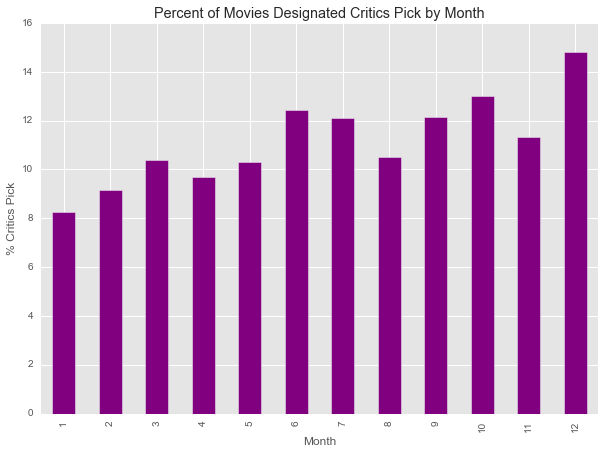

In [51]:
# look at % of movies that are critic's picks by month
grouped = df.groupby(by = 'month')
plt.figure(figsize = (10,7))
(100* grouped['critics_pick'].sum()/grouped['critics_pick'].count()).plot(kind='bar', color = 'purple')
plt.xlabel('Month')
plt.ylabel('% Critics Pick')
plt.title('Percent of Movies Designated Critics Pick by Month')

In [131]:
# save cleaned file for reviews after 2000
df_recent.to_csv('../../NYT_Reviews_Cleaned.csv', encoding='utf-8')